In [2]:
#importing all the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
test=pd.read_csv('test.csv')

In [4]:
train=pd.read_csv('train.csv')

In [5]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [5]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
print(train.shape)
print(test.shape)

(1458644, 11)
(625134, 9)


In [6]:
test.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')

In [7]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [9]:
train.dtypes.value_counts()

object     4
float64    4
int64      3
dtype: int64

In [8]:
test.dtypes.value_counts()

float64    4
object     3
int64      2
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [10]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [11]:
test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


In [12]:
#this will show the correlation between each columns
train_col = train.columns
train[train_col].corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.000000,0.287415,0.007820,0.001742,0.001528,0.004496,0.020304
passenger_count,0.287415,1.000000,0.002169,-0.005125,-0.000343,-0.002762,0.008471
pickup_longitude,0.007820,0.002169,1.000000,0.022568,0.783582,0.100190,0.026542
pickup_latitude,0.001742,-0.005125,0.022568,1.000000,0.114884,0.494038,-0.029204
dropoff_longitude,0.001528,-0.000343,0.783582,0.114884,1.000000,0.124873,0.014678
dropoff_latitude,0.004496,-0.002762,0.100190,0.494038,0.124873,1.000000,-0.020677
trip_duration,0.020304,0.008471,0.026542,-0.029204,0.014678,-0.020677,1.000000


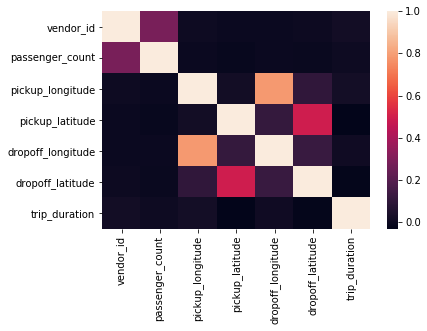

In [13]:
%matplotlib inline
sns.heatmap(train[train_col].corr())

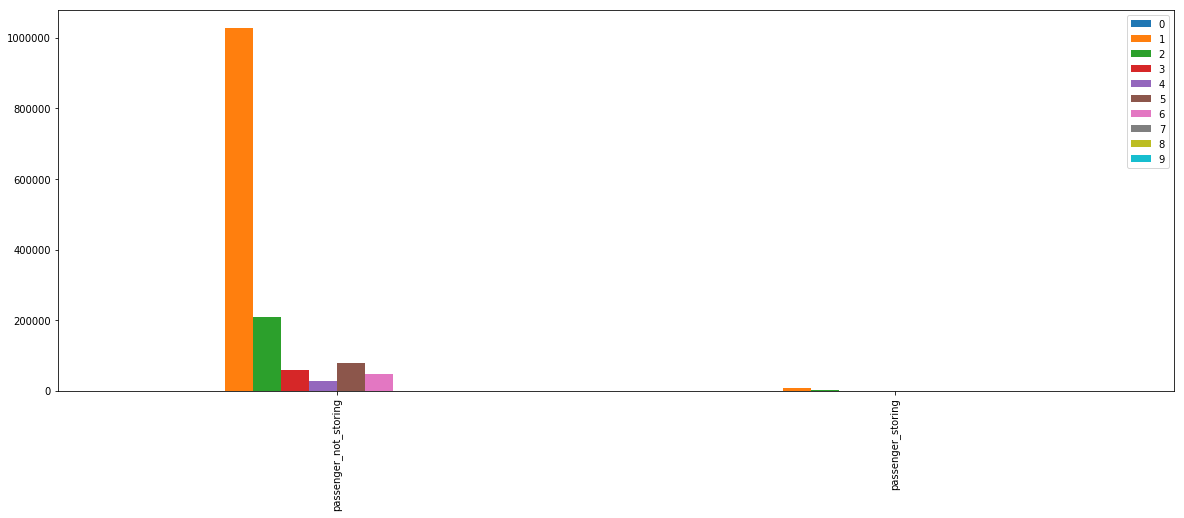

In [14]:
#this gives us the number of passengers of each type has either stored in vehicle memory before sending to the vendor or not
passenger_no = train[train['store_and_fwd_flag']=='N']['passenger_count'].value_counts()
passenger_yes = train[train['store_and_fwd_flag']=='Y']['passenger_count'].value_counts()
df = pd.DataFrame([passenger_no,passenger_yes],index = ['passenger_not_storing','passenger_storing'])
df.plot(figsize=(20,7), kind = 'bar',stacked = False)
#it seems that passengers storing in vehicle memory is very less

In [15]:
test_col = test.columns
test[test_col].corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
vendor_id,1.000000,0.287190,0.006516,0.001968,-0.000070,0.002449
passenger_count,0.287190,1.000000,0.002504,-0.005251,-0.000343,-0.003656
pickup_longitude,0.006516,0.002504,1.000000,0.064708,0.802085,0.140633
pickup_latitude,0.001968,-0.005251,0.064708,1.000000,0.172608,0.445416
dropoff_longitude,-0.000070,-0.000343,0.802085,0.172608,1.000000,0.210971
dropoff_latitude,0.002449,-0.003656,0.140633,0.445416,0.210971,1.000000


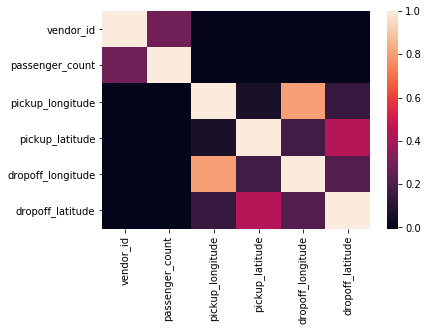

In [16]:
sns.heatmap(test[test_col].corr())

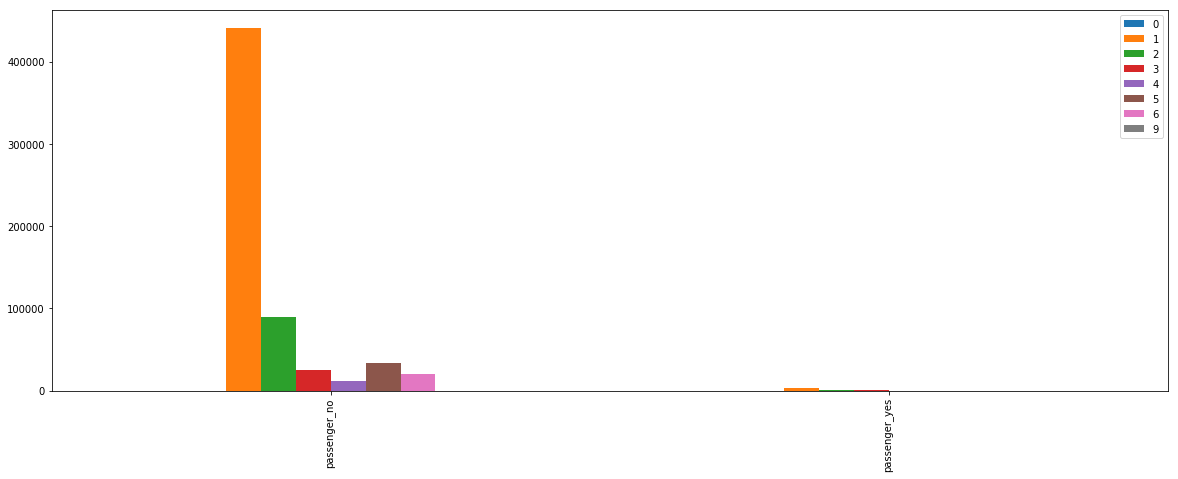

In [17]:
test_passenger_no = test[test['store_and_fwd_flag']=='N']['passenger_count'].value_counts()
test_passenger_yes = test[test['store_and_fwd_flag']=='Y']['passenger_count'].value_counts()
df_test = pd.DataFrame([test_passenger_no,test_passenger_yes],index = ['passenger_no','passenger_yes'])
df_test.plot(figsize=(20,7), kind = 'bar',stacked = False)

In [18]:
train['passenger_count'].unique()

array([1, 6, 4, 2, 3, 5, 0, 7, 9, 8], dtype=int64)

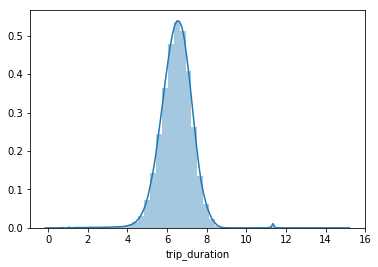

In [19]:
sns.distplot(np.log(train['trip_duration'])) #the trip duration is normalised with a small outlier at trip duration of 2^11.5 sec

In [20]:
train['trip_in_hour']=train['trip_duration']/3600

In [24]:
train.loc[train['trip_in_hour']>=4,['trip_in_hour']]
print(len(train.loc[train['trip_in_hour']>=4,['trip_in_hour']]))
print(len(train.loc[train['trip_in_hour']>=2,['trip_in_hour']]))

2077
2253


In [25]:
#thus we will remove entries with trip_du_hr greater then or equal to 2
lst = []
for i in train.columns:
    lst.append(i)
train=train.loc[train['trip_in_hour']<=2,lst]    

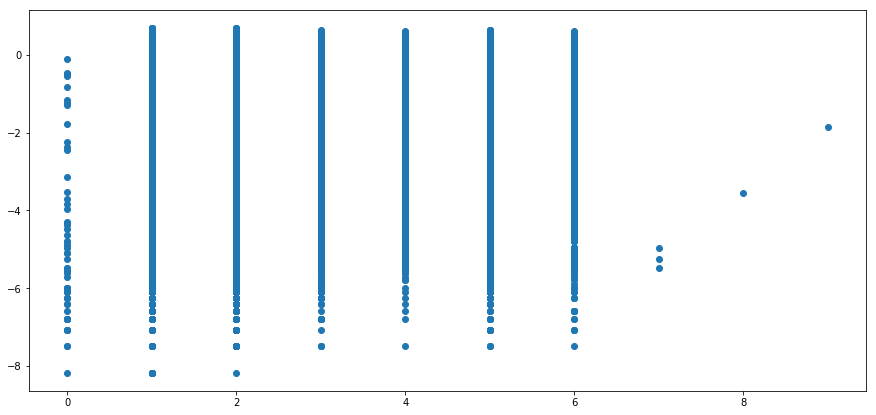

In [26]:
fig = plt.figure(figsize=(15,7))
plt.scatter(x = 'passenger_count', y = np.log(train['trip_in_hour']),data = train)
plt.show()

In [27]:
import warnings 
warnings.filterwarnings('ignore')
# as passenger_count having number greater than 8 are outliers, so I am removing it
train['passenger_count'][train['passenger_count']>=8]=6
test['passenger_count'][test['passenger_count']>=8]=6

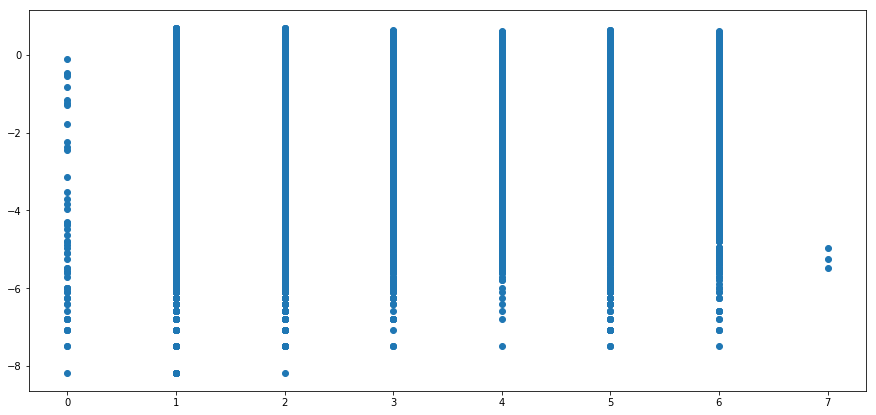

In [28]:
fig = plt.figure(figsize=(15,7))
plt.scatter(x = 'passenger_count', y = np.log(train['trip_in_hour']),data = train)
plt.show()

In [29]:
#To calculate distance between pickup n dropup location
#Source : https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula
from math import sin, cos, sqrt, atan2, radians
def distance(lat1,lat2,lon1,lon2):
    R = 6371.0
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance
train['distance']=[distance(i,j,k,l) for i,j,k,l in zip(train.pickup_latitude,
                                                        train.dropoff_latitude,train.pickup_longitude,
                                                        train.dropoff_longitude)]
test['distance']=[distance(i,j,k,l) for i,j,k,l in zip(test.pickup_latitude,
                                                        test.dropoff_latitude,test.pickup_longitude,
                                                        test.dropoff_longitude)]

In [30]:
#Converting Latitude and Longitude in cartesian form
#Source : https://stackoverflow.com/questions/1185408/converting-from-longitude-latitude-to-cartesian-coordinates
def cartesian_x(lat,lon):
    lat=radians(lat)
    lon=radians(lon)
    R=6371.0
    x = R * cos(lat) * cos(lon)
    return x
def cartesian_y(lat,lon):
    lat=radians(lat)
    lon=radians(lon)
    R=6371.0
    y = R * cos(lat) * sin(lon)
    return y
# extracting cartesian x,y cordinates form latitude and longitude
train['x1']=[cartesian_x(i,j) for i,j in zip(train['pickup_latitude'],train['pickup_longitude'])]
train['y1']=[cartesian_y(i,j) for i,j in zip(train['pickup_latitude'],train['pickup_longitude'])]
train['x2']=[cartesian_x(i,j) for i,j in zip(train['dropoff_latitude'],train['dropoff_longitude'])]
train['y2']=[cartesian_y(i,j) for i,j in zip(train['dropoff_latitude'],train['dropoff_longitude'])]

test['x1']=[cartesian_x(i,j) for i,j in zip(test['pickup_latitude'],test['pickup_longitude'])]
test['y1']=[cartesian_y(i,j) for i,j in zip(test['pickup_latitude'],test['pickup_longitude'])]
test['x2']=[cartesian_x(i,j) for i,j in zip(test['dropoff_latitude'],test['dropoff_longitude'])]
test['y2']=[cartesian_y(i,j) for i,j in zip(test['dropoff_latitude'],test['dropoff_longitude'])]

In [35]:
#Converting Latitude and Longitude to cartesian cordindates 
# Assuming Earth as sphere not ellipsoid 
#reference : https://stackoverflow.com/questions/1185408/converting-from-longitude-latitude-to-cartesian-coordinates
def cart_x(lat,lon):
    lat=radians(lat)
    lon=radians(lon)
    R=6371.0
    x = R * cos(lat) * cos(lon)
    return x
def cart_y(lat,lon):
    lat=radians(lat)
    lon=radians(lon)
    R=6371.0
    y = R * cos(lat) * sin(lon)
    return y
# extracting cartesian x,y cordinates form latitude and longitude
train['x1']=[cart_x(i,j) for i,j in zip(train['pickup_latitude'],train['pickup_longitude'])]
train['y1']=[cart_y(i,j) for i,j in zip(train['pickup_latitude'],train['pickup_longitude'])]
train['x2']=[cart_x(i,j) for i,j in zip(train['dropoff_latitude'],train['dropoff_longitude'])]
train['y2']=[cart_y(i,j) for i,j in zip(train['dropoff_latitude'],train['dropoff_longitude'])]

test['x1']=[cart_x(i,j) for i,j in zip(test['pickup_latitude'],test['pickup_longitude'])]
test['y1']=[cart_y(i,j) for i,j in zip(test['pickup_latitude'],test['pickup_longitude'])]
test['x2']=[cart_x(i,j) for i,j in zip(test['dropoff_latitude'],test['dropoff_longitude'])]
test['y2']=[cart_y(i,j) for i,j in zip(test['dropoff_latitude'],test['dropoff_longitude'])]

In [31]:
#Manhattan Distance
#Source : https://stackoverflow.com/questions/8224470/calculating-manhattan-distance
train['Manhattan_dist'] =(train['x1'] - train['x2']).abs() +(train['y1'] - train['y2']).abs()    
test['Manhattan_dist'] =(test['x1'] - test['x2']).abs() + (test['y1'] - test['y2']).abs()   
#Chebyshev Distance
train['Chebyshev_dist']=[max(abs(i-j),abs(k-l)) for i,j,k,l in zip(train['x1'],
                                                                           train['y1'],train['x2'],
                                                                          train['y2'])]
test['Chebyshev_dist']=[max(abs(i-j),abs(k-l)) for i,j,k,l in zip(test['x1'],
                                                                           test['y1'],test['x2'],
                                                                          test['y2'])]
train['distance1']=[min(abs(i-j),abs(k-l)) for i,j,k,l in zip(train['x1'],train['y1'],train['x2'],train['y2'])]
test['distance1']=[min(abs(i-j),abs(k-l)) for i,j,k,l in zip(test['x1'],test['y1'],test['x2'],test['y2'])]

train['distance2']=(train['x1'] - train['x2']).abs() * (train['y1'] - train['y2']).abs()  
test['distance2']=(test['x1'] - test['x2']).abs() * (test['y1'] - test['y2']).abs()

In [32]:
#Source : https://www.movable-type.co.uk/scripts/latlong.html
def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))
train.loc[:, 'direction'] = bearing_array(train['pickup_latitude'].values, 
                                          train['pickup_longitude'].values, 
                                          train['dropoff_latitude'].values,
                                          train['dropoff_longitude'].values)
test.loc[:, 'direction'] = bearing_array(test['pickup_latitude'].values, 
                                         test['pickup_longitude'].values, 
                                         test['dropoff_latitude'].values, 
                                         test['dropoff_longitude'].values)

In [38]:
#Using These cartesian coordinates we can find the distance between two cartesian points using Manhattan distance and chebyshev distance
#refernce : https://stackoverflow.com/questions/8224470/calculating-manhattan-distance
#Manhattan Distance
train['Manhattan_dist'] =(train['x1'] - train['x2']).abs() +(train['y1'] - train['y2']).abs()    
test['Manhattan_dist'] =(test['x1'] - test['x2']).abs() + (test['y1'] - test['y2']).abs()   
#Chebyshev Distance
train['Chebyshev_dist']=[max(abs(i-j),abs(k-l)) for i,j,k,l in zip(train['x1'],
                                                                   train['y1'],
                                                                   train['x2'],
                                                                   train['y2'])]
test['Chebyshev_dist']=[max(abs(i-j),abs(k-l)) for i,j,k,l in zip(test['x1'],
                                                                  test['y1'],
                                                                  test['x2'],
                                                                  test['y2'])]
train['dis1']=[min(abs(i-j),abs(k-l)) for i,j,k,l in zip(train['x1'],train['y1'],train['x2'],train['y2'])]
test['dis1']=[min(abs(i-j),abs(k-l)) for i,j,k,l in zip(test['x1'],test['y1'],test['x2'],test['y2'])]

train['dis2']=(train['x1'] - train['x2']).abs() * (train['y1'] - train['y2']).abs()  
test['dis2']=(test['x1'] - test['x2']).abs() * (test['y1'] - test['y2']).abs()


In [33]:
train['datetime']=pd.to_datetime(train['pickup_datetime'])
train['hour_of_pickup']=train.datetime.dt.hour
train['day_of_week']=train.datetime.dt.dayofweek
train['day_of_month']=train.datetime.dt.days_in_month
train['month']=train.datetime.dt.month
train['whether_night_time']=[1 if (i==0 or i>=19)  else 0 for i in train['datetime'].dt.hour]
train['whether_late_night_time']=[1 if (i<5 or i>0)  else 0 for i in train['datetime'].dt.hour]
train['week']=train['datetime'].dt.week
train['minute_of_pickup']=train['datetime'].dt.minute
train['weather']=[1 if (i in [1,2,3]) else(2 if (i in [4,11,12]) else 3) for i in train['month']]
train['quarter']=train.datetime.dt.quarter
train['center_latitude']=(train['dropoff_latitude']-train['pickup_latitude'])/2
train['center_longitute']=(train['dropoff_longitude']-train['pickup_longitude'])/2

test['datetime']=pd.to_datetime(test['pickup_datetime'])
test['hour_of_pickup']=test.datetime.dt.hour
test['day_of_week']=test.datetime.dt.dayofweek
test['day_of_month']=test.datetime.dt.days_in_month
test['month']=test.datetime.dt.month
test['whether_night_time']=[1 if (i==0 or i>=19)  else 0 for i in test['datetime'].dt.hour]
test['whether_late_night_time']=[1 if (i<5 or i>0)  else 0 for i in test['datetime'].dt.hour]
test['week']=test['datetime'].dt.week
test['minute_of_pickup']=test['datetime'].dt.minute
test['weather']=[1 if (i in [1,2,3]) else(2 if (i in [4,11,12]) else 3) for i in test['month']]
test['quarter']=test.datetime.dt.quarter
test['center_latitude']=(test['dropoff_latitude']-test['pickup_latitude'])/2
test['center_longitude']=(test['dropoff_longitude']-test['pickup_longitude'])/2

In [40]:
#Calulating Bearing distance Used to calculate the direction in degress
#refernce : https://en.wikipedia.org/wiki/Bearing_(navigation) , https://www.movable-type.co.uk/scripts/latlong.html
def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))
train.loc[:, 'dir'] = bearing_array(train['pickup_latitude'].values, 
                                          train['pickup_longitude'].values, 
                                          train['dropoff_latitude'].values,
                                          train['dropoff_longitude'].values)
test.loc[:, 'dir'] = bearing_array(test['pickup_latitude'].values, 
                                         test['pickup_longitude'].values, 
                                         test['dropoff_latitude'].values, 
                                         test['dropoff_longitude'].values)

In [34]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'trip_in_hour', 'distance', 'x1', 'y1', 'x2', 'y2',
       'Manhattan_dist', 'Chebyshev_dist', 'distance1', 'distance2',
       'direction', 'datetime', 'hour_of_pickup', 'day_of_week',
       'day_of_month', 'month', 'whether_night_time',
       'whether_late_night_time', 'week', 'minute_of_pickup', 'weather',
       'quarter', 'center_latitude', 'center_longitute'],
      dtype='object')

In [35]:
test.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'distance', 'x1', 'y1', 'x2',
       'y2', 'Manhattan_dist', 'Chebyshev_dist', 'distance1', 'distance2',
       'direction', 'datetime', 'hour_of_pickup', 'day_of_week',
       'day_of_month', 'month', 'whether_night_time',
       'whether_late_night_time', 'week', 'minute_of_pickup', 'weather',
       'quarter', 'center_latitude', 'center_longitude'],
      dtype='object')

In [36]:
def dummychange(x):
    if x == 'Y':
        return 1
    else:
        return 0

train['store_and_fwd_flag'] = train['store_and_fwd_flag'].apply(lambda x: dummychange(x))

In [42]:
train.shape

(1456391, 35)

In [37]:
train=train.drop(['id','pickup_datetime','dropoff_datetime','x1', 'y1', 'x2','y2','trip_in_hour','datetime'],1)
tst=test.drop(['id','pickup_datetime','x1', 'y1', 'x2','y2','datetime'],1)

In [38]:
# Extracting possible features from the Date & time coloumn

train['datetime']=pd.to_datetime(train['pickup_datetime'])
train['hr_p']=train.datetime.dt.hour
train['weekday']=train.datetime.dt.dayofweek
train['monthday']=train.datetime.dt.days_in_month
train['month']=train.datetime.dt.month
train['night']=[1 if (i==0 or i>=19)  else 0 for i in train['datetime'].dt.hour]
train['latenight']=[1 if (i<5 or i>0)  else 0 for i in train['datetime'].dt.hour]
train['week']=train['datetime'].dt.week
train['min_pick']=train['datetime'].dt.minute
train['weather']=[1 if (i in [1,2,3]) else(2 if (i in [4,11,12]) else 3) for i in train['month']]
train['quarter']=train.datetime.dt.quarter
train['centerlatitude']=(train['dropoff_latitude']-train['pickup_latitude'])/2
train['centerlongitude']=(train['dropoff_longitude']-train['pickup_longitude'])/2

test['datetime']=pd.to_datetime(test['pickup_datetime'])
test['hr_p']=test.datetime.dt.hour
test['weekday']=test.datetime.dt.dayofweek
test['monthday']=test.datetime.dt.days_in_month
test['month']=test.datetime.dt.month
test['night']=[1 if (i==0 or i>=19)  else 0 for i in test['datetime'].dt.hour]
test['latenight']=[1 if (i<5 or i>0)  else 0 for i in test['datetime'].dt.hour]
test['week']=test['datetime'].dt.week
test['min_pick']=test['datetime'].dt.minute
test['weather']=[1 if (i in [1,2,3]) else(2 if (i in [4,11,12]) else 3) for i in test['month']]
test['quarter']=test.datetime.dt.quarter
test['centerlatitude']=(test['dropoff_latitude']-test['pickup_latitude'])/2
test['centerlongitude']=(test['dropoff_longitude']-test['pickup_longitude'])/2

KeyError: 'pickup_datetime'

In [39]:
from sklearn.cluster import MiniBatchKMeans
coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values))
sample_ind = np.random.permutation(len(coords))
kmeans = MiniBatchKMeans(n_clusters=90, batch_size=10000).fit(coords[sample_ind])

In [40]:
train.loc[:, 'pickup_cluster'] = kmeans.predict(train[['pickup_latitude', 'pickup_longitude']])
train.loc[:, 'dropoff_cluster'] = kmeans.predict(train[['dropoff_latitude', 'dropoff_longitude']])
test.loc[:, 'pickup_cluster'] = kmeans.predict(test[['pickup_latitude', 'pickup_longitude']])
test.loc[:, 'dropoff_cluster'] = kmeans.predict(test[['dropoff_latitude', 'dropoff_longitude']])

In [41]:
y_train=np.log(train['trip_duration'].values + 1)
x_train=train.drop(['trip_duration'],1)

In [45]:
print(train.shape)
print(test.shape)

(1456391, 37)
(625134, 34)


In [46]:
train=train.drop(['id','pickup_datetime','dropoff_datetime','x1', 'y1', 'x2','y2','tripinhr','datetime'],1)
tst=test.drop(['id','pickup_datetime','x1', 'y1', 'x2','y2','datetime'],1)

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['store_and_fwd_flag']=le.fit_transform(train['store_and_fwd_flag'])

In [48]:
y_train=np.log(train['trip_duration'].values + 1)
x_train=train.drop(['trip_duration'],1)

In [49]:
print(train.shape)
print(test.shape)

(1456391, 28)
(625134, 34)


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456391 entries, 0 to 1458643
Data columns (total 28 columns):
vendor_id             1456391 non-null int64
passenger_count       1456391 non-null int64
pickup_longitude      1456391 non-null float64
pickup_latitude       1456391 non-null float64
dropoff_longitude     1456391 non-null float64
dropoff_latitude      1456391 non-null float64
store_and_fwd_flag    1456391 non-null int64
trip_duration         1456391 non-null int64
distance              1456391 non-null float64
Manhattan_dist        1456391 non-null float64
Chebyshev_dist        1456391 non-null float64
dis1                  1456391 non-null float64
dis2                  1456391 non-null float64
dir                   1456391 non-null float64
hr_p                  1456391 non-null int64
weekday               1456391 non-null int64
monthday              1456391 non-null int64
month                 1456391 non-null int64
night                 1456391 non-null int64
latenight   

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 34 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null object
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null object
distance              625134 non-null float64
x1                    625134 non-null float64
y1                    625134 non-null float64
x2                    625134 non-null float64
y2                    625134 non-null float64
Manhattan_dist        625134 non-null float64
Chebyshev_dist        625134 non-null float64
dis1                  625134 non-null float64
dis2                  625134 non-null float64
dir                   625134 non-null float64
datetime              

In [55]:
test.shape

(625134, 34)

In [56]:
from sklearn.cross_validation import cross_val_score
import xgboost as xgb
from sklearn.cross_validation import train_test_split
Xtr, Xv, ytr, yv = train_test_split(x_train, y_train, test_size=0.2, random_state=1900)

In [57]:
dtrain = xgb.DMatrix(Xtr, label=ytr)
dvalid = xgb.DMatrix(Xv, label=yv)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

#From beluga's kernel
xgb_pars = {'min_child_weight': 10, 'eta': 0.03, 'colsample_bytree': 0.3, 'max_depth': 10,
            'subsample': 0.8, 'lambda': 0.5, 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}

In [58]:
model = xgb.train(xgb_pars, dtrain, 100000, watchlist, early_stopping_rounds=90,
                  maximize=False, verbose_eval=100)

[0]	train-rmse:5.83061	valid-rmse:5.83161
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 90 rounds.
[100]	train-rmse:0.46154	valid-rmse:0.467828
[200]	train-rmse:0.338508	valid-rmse:0.353638
[300]	train-rmse:0.32205	valid-rmse:0.344704
[400]	train-rmse:0.311632	valid-rmse:0.34081
[500]	train-rmse:0.30464	valid-rmse:0.338049
[600]	train-rmse:0.299497	valid-rmse:0.336395
[700]	train-rmse:0.296151	valid-rmse:0.335694
[800]	train-rmse:0.293068	valid-rmse:0.335014
[900]	train-rmse:0.290417	valid-rmse:0.334421
[1000]	train-rmse:0.287996	valid-rmse:0.333995
[1100]	train-rmse:0.285853	valid-rmse:0.333588
[1200]	train-rmse:0.283887	valid-rmse:0.33333
[1300]	train-rmse:0.281932	valid-rmse:0.332998
[1400]	train-rmse:0.279796	valid-rmse:0.33255
[1500]	train-rmse:0.277676	valid-rmse:0.332118
[1600]	train-rmse:0.275794	valid-rmse:0.331787
[1700]	train-rmse:0.274168	valid-rmse:0.331586
[1800]	train-rmse:0.272506	va

In [60]:
model.best_score

0.326636

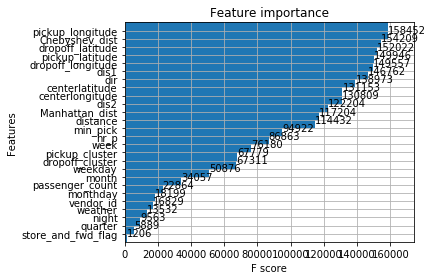

In [67]:
#Plotting important feature after traning the data.... !!! 
xgb.plot_importance(model, ax=None, height=2, xlim=None,
                     title='Feature importance',
                    xlabel='F score', ylabel='Features',
                    importance_type='weight',
                    grid=True)
plt.tight_layout()
plt.show()

In [69]:
import pickle
pickle.dump(model,open('solution.sav','wb'))

In [70]:
model=pickle.load(open('solution.sav','rb'))
tst['store_and_fwd_flag']=le.fit_transform(tst['store_and_fwd_flag'])
dtest = xgb.DMatrix(tst)
ytest = model.predict(dtest)
test['trip_duration'] = np.exp(ytest) - 1
test[['id', 'trip_duration']].to_csv('xgbsolution.csv.gz', index=False, compression='gzip')

In [71]:
ytest

array([ 6.62145376,  6.39034367,  6.00790787, ...,  7.51474619,
        7.53258467,  7.06660414], dtype=float32)

In [72]:
len(ytest)

625134